# 1.Import and store the data in a data frame. (2.5 points)

In [98]:
import pandas as pd
colNames = ["City1", "City2", 'Average Fare', 'Distance', 'AverageWeeklyPassengers', 'MarketLeadingAirline', 'MarketShare', 'AverageFare', 'LowPriceAirline', 'MarketShare1', 'price']
airTrans = pd.read_csv('Air_transportation.csv', names=colNames)
airTrans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
City1                      1000 non-null object
City2                      1000 non-null object
Average Fare               1000 non-null float64
Distance                   1000 non-null int64
AverageWeeklyPassengers    1000 non-null float64
MarketLeadingAirline       1000 non-null object
MarketShare                1000 non-null float64
AverageFare                1000 non-null float64
LowPriceAirline            1000 non-null object
MarketShare1               1000 non-null float64
price                      1000 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.0+ KB


In [99]:
airTrans = airTrans.drop(["City1", "City2",'MarketLeadingAirline','LowPriceAirline'], axis=1)
airTrans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
Average Fare               1000 non-null float64
Distance                   1000 non-null int64
AverageWeeklyPassengers    1000 non-null float64
MarketShare                1000 non-null float64
AverageFare                1000 non-null float64
MarketShare1               1000 non-null float64
price                      1000 non-null float64
dtypes: float64(6), int64(1)
memory usage: 54.8 KB


# 2. Remove the outliers from the data (5 points)

In [100]:
cols = {'Average Fare':0, 'Distance':1, 'AverageWeeklyPassengers':2, 'MarketShare':3, 'AverageFare':4, 'MarketShare1':5, 'price':6}
numericColNames = ['Average Fare', 'Distance', 'AverageWeeklyPassengers', 'MarketShare', 'AverageFare', 'MarketShare1', 'price']

for colname in numericColNames:
    iqr = airTrans[colname].quantile(.75) - airTrans[colname].quantile(.25)
    minCap = airTrans[colname].quantile(.25) - (1.5 * iqr)
    maxCap = airTrans[colname].quantile(.75) + (1.5 * iqr)
    airTrans = airTrans[(airTrans[colname] >= minCap) & (airTrans[colname] <= maxCap)]

print(airTrans.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 877 entries, 0 to 999
Data columns (total 7 columns):
Average Fare               877 non-null float64
Distance                   877 non-null int64
AverageWeeklyPassengers    877 non-null float64
MarketShare                877 non-null float64
AverageFare                877 non-null float64
MarketShare1               877 non-null float64
price                      877 non-null float64
dtypes: float64(6), int64(1)
memory usage: 54.8 KB
None


# 3. Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable. (2.5 points)

In [101]:

X = airTrans.drop('Average Fare', axis=1)
Y = airTrans[["Average Fare"]]


# 4.Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points)

In [102]:
airTrans.corr()

,Average Fare,Distance,AverageWeeklyPassengers,MarketShare,AverageFare,MarketShare1,price
Average Fare,1.000000,0.512280,-0.194769,-0.202205,0.979853,-0.498025,0.837329
Distance,0.512280,1.000000,-0.123024,-0.546091,0.480295,-0.361306,0.531995
AverageWeeklyPassengers,-0.194769,-0.123024,1.000000,0.018146,-0.160751,0.074210,-0.206307
MarketShare,-0.202205,-0.546091,0.018146,1.000000,-0.188915,0.280194,-0.309026
AverageFare,0.979853,0.480295,-0.160751,-0.188915,1.000000,-0.522616,0.790611
MarketShare1,-0.498025,-0.361306,0.074210,0.280194,-0.522616,1.000000,-0.261714
price,0.837329,0.531995,-0.206307,-0.309026,0.790611,-0.261714,1.000000


#### AverageWeeklyPassengers, MarketShare and MarketShare1 are less then 0.1 ie, -0.194769, -0.202205 and -0.498025 respectively, so these columns will be dropped as per the requirement.

In [103]:
airTrans.drop(['AverageWeeklyPassengers', 'MarketShare', 'MarketShare1'], axis=1, inplace=True)
airTrans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 877 entries, 0 to 999
Data columns (total 4 columns):
Average Fare    877 non-null float64
Distance        877 non-null int64
AverageFare     877 non-null float64
price           877 non-null float64
dtypes: float64(3), int64(1)
memory usage: 34.3 KB


# 5. Create scatter Plot of Independent Variable vs Dependent Variable. (2.5 points)

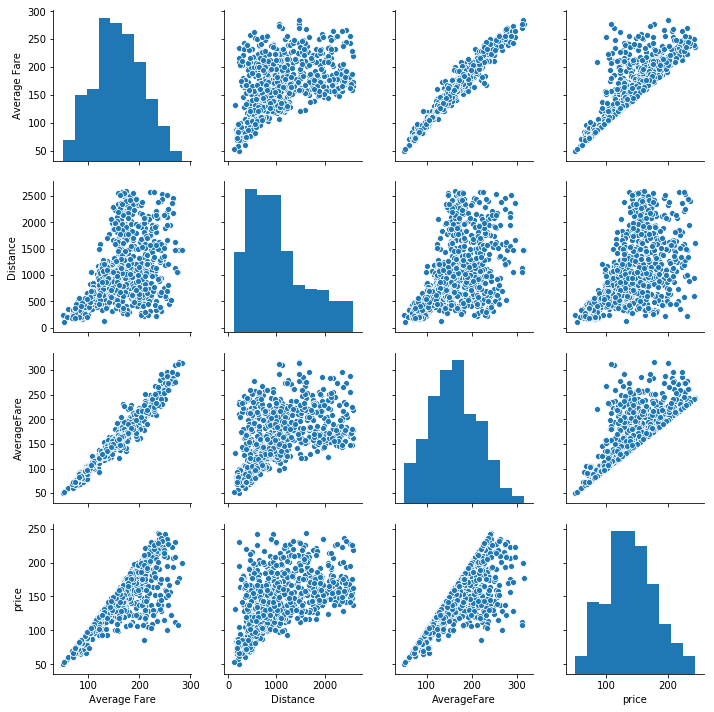

In [106]:
import seaborn as sn
sn.pairplot(airTrans)

# 6.Divide the data set into training and test data set and build a Multiple Linear Regression model. (5 points)

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = airTrans.drop('Average Fare', axis=1)
Y = airTrans[["Average Fare"]]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=7)
print("Shape of the X training set : {0} and X testing set {1}".format(X_train.shape, X_test.shape))

linearRegression = LinearRegression()
linearRegression.fit(X_train, Y_train)


Shape of the X training set : (613, 3) and X testing set (264, 3)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# 7. Print the coefficients & intercepts of the linear regression model (5 points)

In [130]:

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {0} is {1}".format(col_name, linearRegression.coef_[0][idx]))

intercept = linearRegression.intercept_[0]
print("The intercept for the linear regression is {0}".format(intercept))

The coefficient for Distance is 0.001553024485571259
The coefficient for AverageFare is 0.7707061554105854
The coefficient for price is 0.18887762300950314
The intercept for the linear regression is 6.890778143075465


# 8. Print the accuracy of the overall model (2.5 points)

In [131]:
# show accuracy
print("Train set Accuracy: {0}".format(linearRegression.score(X_train, Y_train)))
print("Test set Accuracy: {0}".format(linearRegression.score(X_test, Y_test)))

Train set Accuracy: 0.9681495735358673
Test set Accuracy: 0.9772078290268619
